# i. Introduction


Imam Buchori Zarkasie

Dataset: Querying from Google Bigquery

DATASET SQL SYNTAX:

SELECT * FROM 'bigquery-public-data.covid19_jhu_csse.summary';

Problem Statement

Health problems are an important aspect for every country, especially since the Covid-19 pandemic has appeared in many countries in the world that have been affected.

This project will explore and retrieve *insight* from the available datasets, analysis will be carried out to determine the number of *confirmed* and *recovered* cases from various countries during the Covid-19 pandemic.

#ii. Import Library

In [ ]:
import numpy as np
import pandas as pd


#iii. Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset GC1/h8dsft_P0GC1_imamzarkasie.csv")

In [ ]:
df

The dataset consists of 4264080 rows and 13 columns.

In [ ]:
df.describe().round()

In [ ]:
df.head(5)

In [ ]:
df.tail(5)

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
4264075,Wisconsin,US,2022-09-29,42.679496,-89.602433,POINT(-89.60243287 42.6794956),10764.0,60.0,NaN,NaN,55045.0,Green,"Green, Wisconsin, US"
4264076,Wisconsin,US,2022-09-29,44.318649,-90.805668,POINT(-90.80566792 44.31864893),6538.0,45.0,NaN,NaN,55053.0,Jackson,"Jackson, Wisconsin, US"
4264077,Wisconsin,US,2022-09-29,43.906325,-91.114511,POINT(-91.11451093 43.90632465),41002.0,198.0,NaN,NaN,55063.0,La Crosse,"La Crosse, Wisconsin, US"
4264078,Wisconsin,US,2022-09-29,44.475587,-89.501530,POINT(-89.50152965 44.47558711),21209.0,165.0,NaN,NaN,55097.0,Portage,"Portage, Wisconsin, US"
4264079,Wisconsin,US,2022-09-29,43.425741,-89.949661,POINT(-89.94966132 43.42574087),19382.0,146.0,NaN,NaN,55111.0,Sauk,"Sauk, Wisconsin, US"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264080 entries, 0 to 4264079
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   province_state  object 
 1   country_region  object 
 2   date            object 
 3   latitude        float64
 4   longitude       float64
 5   location_geom   object 
 6   confirmed       float64
 7   deaths          float64
 8   recovered       float64
 9   active          float64
 10  fips            float64
 11  admin2          object 
 12  combined_key    object 
dtypes: float64(7), object(6)
memory usage: 422.9+ MB


#iv. Data Cleaning

####Check missing value

In [ ]:
df.isna().sum()

province_state     191891
country_region          1
date                    0
latitude            95263
longitude           95263
location_geom       95263
confirmed              19
deaths                442
recovered         2828489
active            2836568
fips               764588
admin2             759505
combined_key         7618
dtype: int64

There are missing values ​​on several attributes

In [ ]:
#Backup Data
covid = df.copy()

In [ ]:
covid.shape

(4264080, 13)

In [ ]:
covid.describe().round()

,latitude,longitude,confirmed,deaths,recovered,active,fips
count,4168817.0,4168817.0,4264061.0,4263638.0,1435591.0,1427512.0,3499492.0
mean,36.0,-72.0,74242.0,1026.0,16362.0,6557.0,32288.0
std,13.0,54.0,586461.0,6351.0,134176.0,92861.0,17933.0
min,-72.0,-178.0,-302844.0,-178.0,-854405.0,-6298082.0,60.0
25%,33.0,-97.0,801.0,11.0,0.0,55.0,19041.0
50%,38.0,-87.0,3741.0,58.0,0.0,471.0,30057.0
75%,42.0,-78.0,16065.0,223.0,0.0,2248.0,47029.0
max,72.0,178.0,38618509.0,624641.0,6399531.0,10877758.0,99999.0


In [ ]:
covid.isna().sum()

province_state     191891
country_region          1
date                    0
latitude            95263
longitude           95263
location_geom       95263
confirmed              19
deaths                442
recovered         2828489
active            2836568
fips               764588
admin2             759505
combined_key         7618
dtype: int64

####Delete not required columns

In [ ]:
drop_columns = ["latitude", "longitude","location_geom", "combined_key"]

In [ ]:
covid.drop(drop_columns, inplace=True, axis=1)

Eliminate the attributes "latitude", "longitude", "location_geom", "combined_key" because the geographic value is not a problem that you want to discuss, while the "combined_key" values ​​can be seen separately in the "province_state", "country_region" and "admin2" attributes

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264080 entries, 0 to 4264079
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   province_state  object 
 1   country_region  object 
 2   date            object 
 3   confirmed       float64
 4   deaths          float64
 5   recovered       float64
 6   active          float64
 7   fips            float64
 8   admin2          object 
dtypes: float64(5), object(4)
memory usage: 292.8+ MB


####Replace Missing Value

The attributes "province_state" and "admin2" are filled with the mode value of each attribute because they are categorical variables

In [ ]:
df["province_state"].value_counts()

Texas                      272341
Georgia                    174190
Virginia                   144970
Kentucky                   130145
Missouri                   125291
                            ...  
Wuhan Evacuee                   1
External territories            1
Unassigned Location, VT         1
Jervis Bay Territory            1
Queens County, NY               1
Name: province_state, Length: 759, dtype: int64

In [ ]:
df["admin2"].value_counts()

Unassigned            54609
Washington            32474
Jefferson             28094
Franklin              26988
Lincoln               25827
                      ...  
Walla Walla County        1
Garfield County           1
Desoto                    1
Brockton                  1
Unknown                   1
Name: admin2, Length: 1960, dtype: int64

In [ ]:
covid["province_state"].fillna(
    value="Texas",
    inplace=True
)

In [ ]:
covid["admin2"].fillna(
    value="Unassigned",
    inplace=True
)

The "recovered", "active", and "deaths" attributes are filled with the percentage of the mean value of each attribute to the "confirmed" mean value, because the number is tentative depending on the "confirmed" value.

In [ ]:
covid["recovered"].fillna(
    value= ((covid["confirmed"])*0.22),
    inplace=True
)

Mean value "recovered" = 16362 / nilai mean "confirmed" = 74242

=0.22

In [ ]:
covid["active"].fillna(
    value = ((covid["confirmed"])*0.08),
    inplace=True
)

Mean Value "Active" = 6557 / nilai mean "confirmed" = 74242

=0.08

In [ ]:
covid["deaths"].fillna(
    value=((covid["confirmed"])*0.01),
    inplace=True
)

Mean value "deaths" = 742 / nilai mean "confirmed" = 74242

=0.01

In [ ]:
covid["fips"].fillna(
    value=(32288),
    inplace=True
)

For fips it is filled with its own mean value only

In [ ]:
covid_without_na = covid.dropna()
covid_without_na.shape

(4264060, 9)

Eliminate the missing value on the "confirmed" attribute with dropna

In [ ]:
covid_without_na.shape

(4264060, 9)

In [ ]:
covid_without_na.isnull().sum()

province_state    0
country_region    0
date              0
confirmed         0
deaths            0
recovered         0
active            0
fips              0
admin2            0
dtype: int64

There are no missing values ​​in all attributes

####Handling invalid values

In [ ]:
covid_without_na.describe().round()

There are invalid values, namely negative values ​​on several attributes

In [ ]:
invalid_values_active=covid_without_na[(covid_without_na["active"] < 0)].index
covid_without_na.drop(invalid_values_active, inplace=True)

Eliminate invalid values, where the number of active cases is negative

In [ ]:
invalid_values_recovered=covid_without_na[(covid_without_na["recovered"] < 0)].index
covid_without_na.drop(invalid_values_recovered, inplace=True)

Eliminate the invalid value, where the number of recovered cases is negative

In [ ]:
invalid_values_deaths=covid_without_na[(covid_without_na["deaths"] < 0)].index
covid_without_na.drop(invalid_values_deaths, inplace=True)

Eliminate the invalid value, where the death rate is negative

In [ ]:
covid_without_na.describe().round()

,confirmed,deaths,recovered,active,fips
count,4259883.0,4259883.0,4259883.0,4259883.0,4259883.0
mean,74307.0,1026.0,19794.0,7840.0,32266.0
std,586743.0,6352.0,146819.0,65599.0,16215.0
min,0.0,0.0,0.0,0.0,60.0
25%,804.0,11.0,0.0,134.0,20199.0
50%,3747.0,58.0,650.0,491.0,32288.0
75%,16087.0,223.0,3354.0,2077.0,42041.0
max,38618509.0,624641.0,8496071.0,10877758.0,99999.0


There are no invalid/negative values ​​anymore

In [ ]:
covid_without_na.info()

In [ ]:
covid_without_na.tail()

In [ ]:
covid_without_na["province_state"] = covid_without_na.province_state.astype('object')
covid_without_na["date"] = pd.to_datetime(covid_without_na["date"])
covid_without_na["confirmed"] = covid_without_na.confirmed.astype('int')
covid_without_na["deaths"] = covid_without_na.deaths.astype('int')
covid_without_na["recovered"] = covid_without_na.recovered.astype('int')
covid_without_na["active"] = covid_without_na.active.astype('int')
covid_without_na["fips"] = covid_without_na.fips.astype('int')

Change the data type

#v. Exploratory Data Analysis (EDA)

#### Queries on Datasets

In [ ]:
covid_without_na.query('confirmed == confirmed.max()')

,province_state,country_region,date,confirmed,deaths,recovered,active,fips,admin2
1063940,Texas,France,2023-03-09,38618509,161512,8496071,3089480,32288,Unassigned


The input with the highest "confirmed" covid number is in line 1063940 with "province_state" = "Texas" and "country_region" = "France"

In [ ]:
covid_without_na.query('recovered == recovered.max()')

Then check the highest "recovered" value, and find the same row in the previous query,

where this explains that the "recovered" value is directly proportional to the "confirmed" value.

In [ ]:
covid_without_na[(covid_without_na['confirmed'] == 0)]

,province_state,country_region,date,confirmed,deaths,recovered,active,fips,admin2
289,Nevada,US,2020-05-15,0,0,0,0,32027,Pershing
383,California,US,2020-05-15,0,0,0,0,90006,Unassigned
533,Unknown,India,2022-05-26,0,0,0,0,32288,Unassigned
1000,Recovered,US,2022-05-26,0,0,0,0,32288,Unassigned
1010,South Carolina,US,2022-05-26,0,0,0,0,90045,Unassigned
...,...,...,...,...,...,...,...,...,...
4263509,Unknown,Mexico,2022-09-29,0,0,0,0,32288,Unassigned
4263563,Arizona,US,2022-09-29,0,0,0,0,90004,Unassigned
4263705,Kansas,US,2022-09-29,0,0,0,0,90020,Unassigned
4263935,Pennsylvania,US,2022-09-29,0,0,0,0,90042,Unassigned


Following are some countries where there are no "confirmed" covid cases in the following lines, namely 58517 lines.

In [ ]:
covid_without_na[(covid_without_na['confirmed'] == 0) & (covid_without_na['country_region'] == "Texas")]

###Grouping dan Aggregating

In [ ]:
covid_without_na.groupby("country_region", sort=False)["confirmed"].sum()

country_region
US                53726475521
Canada             2259861735
China              1156479544
United Kingdom    12125403948
Netherlands        4109328781
                     ...     
St. Martin                  2
North Ireland               1
Ivory Coast                 1
Cape Verde                  1
East Timor                  1
Name: confirmed, Length: 252, dtype: int64

It was found that "country_region" = "US" had the most "confirmed" cases totaling 53726475521 cases.

In [ ]:
covid_without_na.groupby(["country_region"], sort=False)["confirmed"].mean()

It was found that the country with the highest average number of "confirmed" covid cases was the United Kingdom, which was 688630

In [ ]:
covid_without_na["province_state"].value_counts()

Texas                      464178
Georgia                    174190
Virginia                   144960
Kentucky                   130145
Missouri                   125288
                            ...  
Jefferson County, KY            1
Fench Guiana                    1
Jervis Bay Territory            1
Unassigned Location, VT         1
Queens County, NY               1
Name: province_state, Length: 759, dtype: int64

The frequency of occurrence of covid cases every day most often appears from "province_state" = "Texas"

###Data Visualization

In [ ]:
%matplotlib inline

<Axes: xlabel='date'>

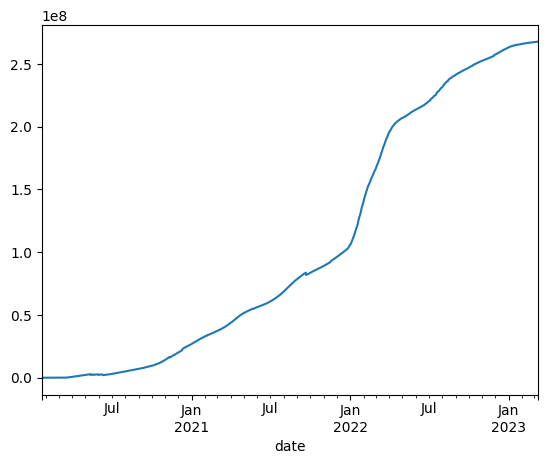

In [ ]:
covid_without_na[covid_without_na["province_state"] == "Texas"].groupby("date")["confirmed"].sum().plot()

<Axes: xlabel='date'>

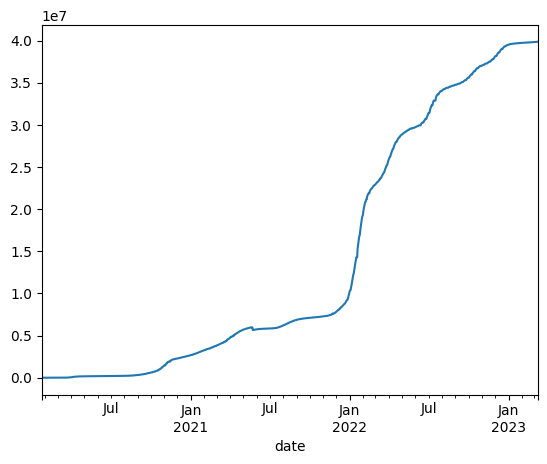

In [ ]:
covid_without_na[covid_without_na["country_region"] == "France"].groupby("date")["confirmed"].sum().plot()

From the two plots above, it can be seen that a spike in Covid-19 cases occurred after Jan-2022

<Axes: xlabel='province_state'>

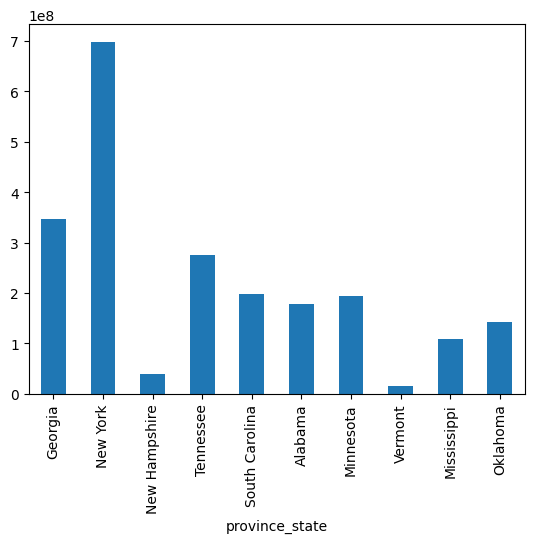

In [ ]:
covid_without_na.groupby("province_state", sort=False)["recovered"].sum().head(10).plot(kind="bar")

The graph above shows that the state of "New York" is the state with the highest "recovered" rate compared to the others

#vi. Conclusion

 *   The state of "Texas" is the area with the most new cases of Covid-19 every day, so new regulations are needed that can reduce new cases.


*   The state of "New York" is the area with the highest "Recovered" rate so that it can reduce the number of active cases. It needs to be used as an example for other states in implementing health protocols.



*   The high spike in Covid cases occurred after January 2022. This needs to be investigated in terms of health protocol factors and changes in the number of residents in the area.




